### MNIST CNN Sample

In [4]:
# Tensorflow logging: OFF
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [5]:
# Generic libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Machine learning
import tensorflow as tf
from keras import backend

# CNN layers
from tensorflow.keras.layers import (Conv2D, MaxPooling2D)
from tensorflow.keras.layers import (Dropout, BatchNormalization, Flatten, Dense)
from tensorflow.keras.layers import LeakyReLU

# MNIST dataset
from tensorflow.keras.datasets import mnist

# Optimiziers
from tensorflow.keras.optimizers import Adam

# Others
from tensorflow.keras import Input

print(tf.__version__)

2.14.0


In [6]:
# Load MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [7]:
print(f"train_images.shape: {train_images.shape}")
print(f"train_labels.shape: {train_labels.shape}")
print(f"test_images.shape: {test_images.shape}")
print(f"test_labels.shape: {test_labels.shape}")

train_images.shape: (60000, 28, 28)
train_labels.shape: (60000,)
test_images.shape: (10000, 28, 28)
test_labels.shape: (10000,)


In [8]:
# Define the input shape of the images and the number of classes
num_classes = 10
img_rows, img_cols = 28, 28

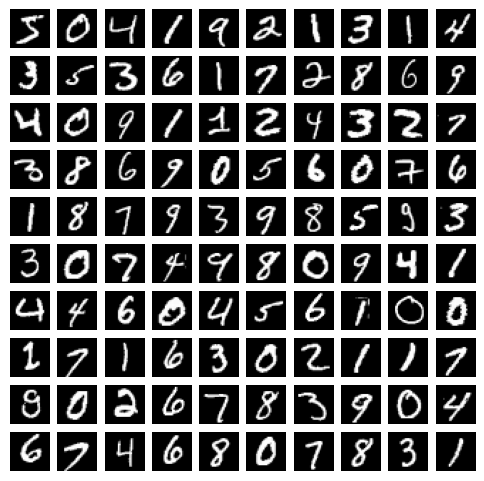

In [9]:
# Show grid of 10x10 images
fig, ax = plt.subplots(10, 10, figsize=(6,6))
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(train_images[i*10+j], cmap='gray')
        ax[i,j].axis('off')
plt.show()

#### Data Pre-Processing

In [10]:
# Normalize the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [11]:
# Print shape of the dataset
print(f"train_images.shape: {train_images.shape}")
print(f"test_images.shape: {test_images.shape}")

train_images.shape: (60000, 28, 28)
test_images.shape: (10000, 28, 28)


In [12]:
# Reshape the images to add the mono channel dimension (1)
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

In [13]:
# Convert class vectors to binary class matrices
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

In [14]:
# Print shape of the labels
print(f"train_labels.shape: {train_labels.shape}")
print(f"test_labels.shape: {test_labels.shape}")

train_labels.shape: (60000, 10)
test_labels.shape: (10000, 10)


#### Define Model

In [15]:
def create_cnn_model(input_shape, num_classes):
    # Input layer
    inputs = Input(shape=input_shape)
    # Convolutional layers
    x = Conv2D(16, kernel_size=(3, 3), activation=LeakyReLU(0.1))(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(32, (3, 3), activation=LeakyReLU(0.1))(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # Dropout layer
    x = Dropout(0.25)(x)
    # Flatten layer
    x = Flatten()(x)
    # Dense layers
    x = Dense(64, activation=LeakyReLU(0.1))(x)
    x = Dropout(0.4)(x)
    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)
    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

In [16]:
model = create_cnn_model((img_rows, img_cols, 1), num_classes)

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0     

#### Train Model

In [18]:
history = model.fit(
    train_images,
    train_labels,
    epochs=20,
    validation_data=(test_images, test_labels)
)

Epoch 1/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2579 - accuracy: 0.9200 - val_loss: 0.0605 - val_accuracy: 0.9805
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1009 - accuracy: 0.9698 - val_loss: 0.0486 - val_accuracy: 0.9841
Epoch 3/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0824 - accuracy: 0.9751 - val_loss: 0.0389 - val_accuracy: 0.9872
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0677 - accuracy: 0.9793 - val_loss: 0.0326 - val_accuracy: 0.9887
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0632 - accuracy: 0.9809 - val_loss: 0.0350 - val_accuracy: 0.9880
Epoch 6/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0541 - accuracy: 0.9833 - val_loss: 0.0304 - val_accuracy: 0.9896
Epoch 7/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0523 - accuracy: 0.9835 - val_loss: 0.0278 - val_a

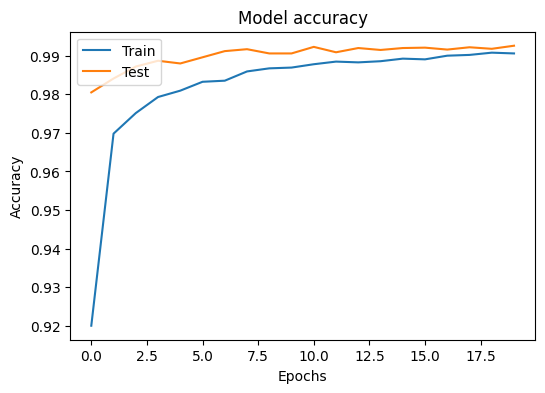

In [20]:
# Plot training & validation accuracy values
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Save Model

In [25]:
# Save the model
MODEL_SAVED = "./Models/MNIST_CNN.keras"
model.save(MODEL_SAVED)

#### Predictions

In [26]:
# Load the model
model = tf.keras.models.load_model(MODEL_SAVED)

# Get the predictions
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [32]:
# Print prediction
predictions = [x * 100 for x in predictions]
print(predictions[0])

[5.7622994e-08 5.2644218e-06 1.9288802e-05 1.8686701e-07 5.0521449e-09
 5.3212668e-10 3.3540648e-14 9.9999990e+03 5.1015132e-08 3.9110611e-05]


In [28]:
# Print the predicted class
print(np.argmax(predictions[0]))

7


In [29]:
# Print the real class
print(test_labels[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


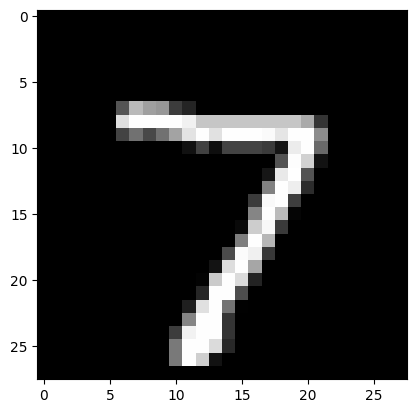

In [30]:
# Print the image
plt.imshow(test_images[0].reshape(28,28), cmap='gray')
plt.show()